In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('data_preprocessed.csv')

In [14]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40,USA,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13,USA,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40,USA,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40,USA,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40,other,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0,36,USA,<=50K
48838,64,NaN,321403,HS-grad,Widowed,NaN,Other-relative,Black,Male,0.0,0,40,USA,<=50K
48839,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0,50,USA,<=50K
48840,44,Private,83891,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0,40,USA,<=50K


In [16]:
df['income'].apply(lambda x: 1 if x=='>50K' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [9]:
df = pd.read_csv('data_preprocessed.csv')
df = pd.get_dummies(df, drop_first=True)
df

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_other,income_>50K
0,39,77516,2174.0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,50,83311,0.0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,38,215646,0.0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,53,234721,0.0,0,40,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,28,338409,0.0,0,40,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,0.0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,64,321403,0.0,0,40,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
48839,38,374983,0.0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
48840,44,83891,5455.0,0,40,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [10]:
df.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Hand

In [8]:
df = pd.read_csv('data_preprocessed.csv')
scaler = MinMaxScaler()

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
pd.get_dummies(df, drop_first=True)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_other,income_>50K
0,0.301370,0.044131,0.052626,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.452055,0.048052,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,0.287671,0.137581,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.493151,0.150486,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.150685,0.220635,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.301370,0.137428,0.000000,0.0,0.357143,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,0.643836,0.209130,0.000000,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
48839,0.287671,0.245379,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
48840,0.369863,0.048444,0.132050,0.0,0.397959,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


c:\Users\kaami\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\kaami\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\kaami\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\kaami\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\kaami\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\kaami\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\kaami\anaconda3\lib\site-

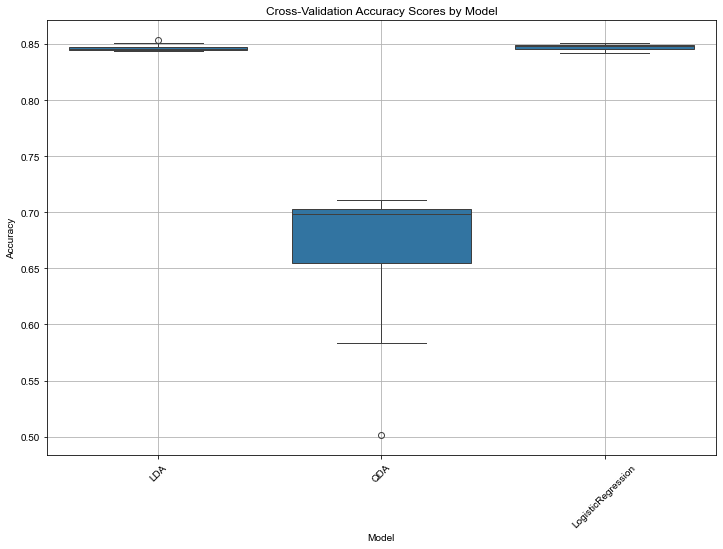

In [7]:
def preprocess_data(df, drop_columns=[]):
    df = df.dropna()
    scaler = MinMaxScaler()

    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    df = pd.get_dummies(df, drop_first=True)
    df = df.drop(columns=drop_columns)
    return df

def train_and_evaluate_models(X_train, y_train, X_test, y_test, model_params):
    results = {}
    for name, model, params in model_params:
        clf = GridSearchCV(model, params, cv=5)
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        cm_train = confusion_matrix(y_train, y_pred_train)
        cm_test = confusion_matrix(y_test, y_pred_test)
        results[name] = {'model': clf.best_estimator_, 'cm_train': cm_train, 'cm_test': cm_test}
    return results

def perform_cross_validation(model_list, X, y):
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
    scores_data = []
    
    for name, model in model_list:
        scores = cross_val_score(model, X, y, cv=rskf, scoring='accuracy')
        for score in scores:
            scores_data.append({'Model': name, 'Accuracy': score})
    
    # Create DataFrame for visualization
    scores_df = pd.DataFrame(scores_data)
    
    # Plotting
    plt.figure(figsize=(12, 8))  # Wider figure for clarity
    sns.boxplot(x='Model', y='Accuracy', data=scores_df)
    plt.title('Cross-Validation Accuracy Scores by Model')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)  # Rotate model names for better readability
    plt.grid(True)  # Add grid for better readability of scales
    sns.set_style("whitegrid")  # Set the style of the visualization
    plt.show()

# Main execution
df = pd.read_csv('data_preprocessed.csv')
df = df.dropna()
X = preprocess_data(df, drop_columns=['income_>50K'])
y = df['income'].apply(lambda x: 1 if x=='>50K' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = [
    ('LDA', LinearDiscriminantAnalysis(), {}),
    ('QDA', QuadraticDiscriminantAnalysis(), {}),
    ('LogisticRegression', LogisticRegression(), {'C': [0.1, 1, 10]}),
    # Add other models and parameters similarly
]

trained_models = train_and_evaluate_models(X_train, y_train, X_test, y_test, models)
cv_results = perform_cross_validation([(name, mod['model']) for name, mod in trained_models.items()], X, y)


In [13]:
from sklearn.metrics import accuracy_score, f1_score

def extract_metrics_from_cm(results):
    metrics = {}
    for name, result in results.items():
        tn_train, fp_train, fn_train, tp_train = result['cm_train'].ravel()
        tn_test, fp_test, fn_test, tp_test = result['cm_test'].ravel()

        # Compute accuracy and F1 score from confusion matrix
        accuracy_train = (tp_train+tn_train)/(tn_train + fp_train + fn_train + tp_train)
        accuracy_test = (tp_test+tn_test)/(tn_test + fp_test + fn_test + tp_test)
        
        f1_train = 2*tp_train/(2*tp_train+fp_train+fn_train)
        f1_test = 2*tp_test/(2*tp_test+fp_test+fn_test)

        metrics[name] = {
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'f1_train': f1_train,
            'f1_test': f1_test
        }
    return metrics

import matplotlib.pyplot as plt
import numpy as np

def plot_model_performance(metrics):
    labels = list(metrics.keys())
    accuracy_train = [m['accuracy_train'] for m in metrics.values()]
    accuracy_test = [m['accuracy_test'] for m in metrics.values()]
    f1_train = [m['f1_train'] for m in metrics.values()]
    f1_test = [m['f1_test'] for m in metrics.values()]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # narrower bars for better separation

    fig, ax = plt.subplots(figsize=(14, 8))
    rects1 = ax.bar(x - 1.5*width, accuracy_train, width, label='Accuracy (Train)')
    rects2 = ax.bar(x - 0.5*width, accuracy_test, width, label='Accuracy (Test)')
    rects3 = ax.bar(x + 0.7*width, f1_train, width, label='F1 Score (Train)')
    rects4 = ax.bar(x + 1.7*width, f1_test, width, label='F1 Score (Test)')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Model')
    ax.set_title('Model Performance: Accuracy and F1 Score')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()

    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')
    ax.bar_label(rects3, padding=3, fmt='%.2f')
    ax.bar_label(rects4, padding=3, fmt='%.2f')

    plt.show()




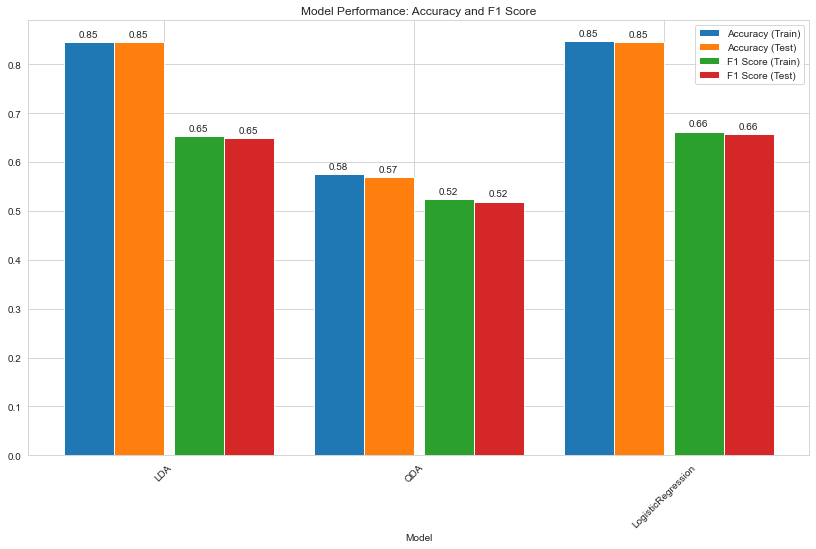

In [14]:
model_metrics = extract_metrics_from_cm(trained_models)
plot_model_performance(model_metrics)

In [15]:
from sklearn.metrics import precision_score, recall_score

def extract_precision_recall_from_cm(results):
    metrics = {}
    for name, result in results.items():
        tn_train, fp_train, fn_train, tp_train = result['cm_train'].ravel()
        tn_test, fp_test, fn_test, tp_test = result['cm_test'].ravel()

        # Compute precision and recall from confusion matrix
        precision_train = tp_train/(tp_train+fp_train)
        recall_train = tp_train/(tp_train+fn_train)
        
        precision_test = tp_test/(tp_test+fp_test)
        recall_test = tp_test/(tp_test+fn_test)

        metrics[name] = {
            'precision_train': precision_train,
            'precision_test': precision_test,
            'recall_train': recall_train,
            'recall_test': recall_test
        }
    return metrics


def plot_precision_recall_performance(metrics):
    labels = list(metrics.keys())
    precision_train = [m['precision_train'] for m in metrics.values()]
    precision_test = [m['precision_test'] for m in metrics.values()]
    recall_train = [m['recall_train'] for m in metrics.values()]
    recall_test = [m['recall_test'] for m in metrics.values()]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # narrower bars for better separation

    fig, ax = plt.subplots(figsize=(14, 8))
    rects1 = ax.bar(x - 1.5*width, precision_train, width, label='Precision (Train)', color='blue')
    rects2 = ax.bar(x - 0.5*width, precision_test, width, label='Precision (Test)', color='orange')
    # Add space by shifting Recall bars slightly to the right
    rects3 = ax.bar(x + 0.7*width, recall_train, width, label='Recall (Train)', color='green')
    rects4 = ax.bar(x + 1.7*width, recall_test, width, label='Recall (Test)', color='red')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Model')
    ax.set_title('Model Performance: Precision and Recall')
    ax.set_xticks(x + 0.1*width)  # Adjust x-ticks to align with the middle of the grouped bars
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()

    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')
    ax.bar_label(rects3, padding=3, fmt='%.2f')
    ax.bar_label(rects4, padding=3, fmt='%.2f')

    plt.show()

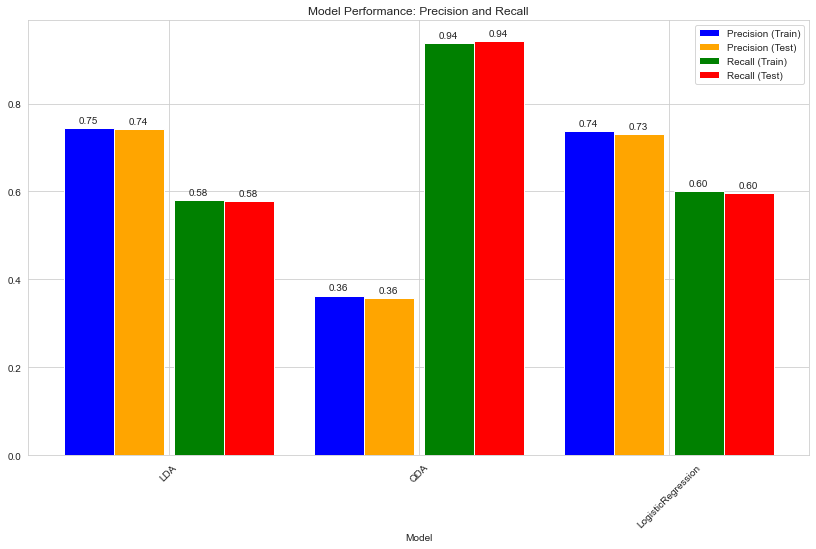

In [16]:
model_metrics = extract_precision_recall_from_cm(trained_models)
plot_precision_recall_performance(model_metrics)